In [32]:
import string #konstanta
from sklearn.pipeline import Pipeline 
import pandas as pd #pemrosesan data
import numpy as np #komputasi numerik
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
data = pd.read_excel('FIX.xlsx')
data.head()

,Tweet,Hasil
0,Performa permainan Timnas ini di Sea Games kal...,Puas
1,Alhamdulillah Ya Allah. Masya Allah Tabarakall...,Puas
2,"Di tangan Indra Sjafri, timnas Indonesia berha...",Puas
3,"@ID_Albiceleste @Indostransfer betul sih, perf...",Puas
4,"Mantap Timnas, patut di acungi jempol, tapi Th...",Puas


In [34]:
data.shape

(265, 2)

In [59]:
data['Hasil'].value_counts()

Hasil
Puas          188
Tidak puas     77
Name: count, dtype: int64

In [82]:
def remove_pattern(input_text,pattern):
    r= re.findall(pattern, input_text)
    for i in r:
       input_text = re.sub(i, '', input_text)
    return input_text
data['Tweet'] = np.vectorize(remove_pattern)(data['Tweet'],"@[\w]*") 
data.head()

,Tweet,Hasil
0,Performa permainan Timnas ini di Sea Games kal...,Puas
1,Alhamdulillah Ya Allah. Masya Allah Tabarakall...,Puas
2,"Di tangan Indra Sjafri, timnas Indonesia berha...",Puas
3,"betul sih, performa squad timnas u23 sea gam...",Puas
4,"Mantap Timnas, patut di acungi jempol, tapi Th...",Puas


casefolding

In [94]:
import re
def casefolding(tweet):
    tweet = tweet.lower()
    tweet = tweet.strip(" ")
    tweet = re.sub(r'[?|$|.|!_:")(-+,]','', tweet)
    return tweet
data['Tweet'] = data['Tweet'].apply(casefolding)
data.head(3)

,Tweet,Hasil
0,performa permainan timnas ini di sea games kal...,Puas
1,alhamdulillah ya allah masya allah tabarakalla...,Puas
2,di tangan indra sjafri timnas indonesia berhas...,Puas


tokenizing (split)

In [95]:
def token(tweets):
    nstr = tweets.split(' ')
    dat = []
    a = -1
    for hu in nstr:
        a += 1
    if hu == '':
        dat.append(a)
    p = 0
    b = 0
    for q in dat:
        b = q-p
        del nstr[b]
        p += 1
    return nstr
data['Tweet'] = data['Tweet'].apply(token)
data.head(3)

,Tweet,Hasil
0,"[performa, permainan, timnas, ini, di, sea, ga...",Puas
1,"[alhamdulillah, ya, allah, masya, allah, tabar...",Puas
2,"[di, tangan, indra, sjafri, timnas, indonesia,...",Puas


filtering

In [96]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def stopword_removal(tweets):
    filtering = stopwords.words('indonesian', 'english')
    x = []
    data = []
    def myFunc(x):
        if x  in filtering:
            return False
        else:
            return True
    fit = filter(myFunc, tweets)
    for x in fit:
        data.append(x)
        return data
data['Tweet'] = data['Tweet'].apply(stopword_removal)
data.head(2)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rasxp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Tweet,Hasil
0,[performa],Puas
1,[alhamdulillah],Puas


stemming (mengubah jadi kata dasar)

In [ ]:
! pip install Sastrawi
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(tweets):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []

    for w in tweets:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean = []
    d_clean = "".join(do)
    print(d_clean)
    return d_clean
data['Tweet'] = data['Tweet'].apply(stemming)

data.to_excel('data_clean2.xlsx', index = False)
data_clean = pd.read_excel('data_clean2.xlsx')
data_clean.head(2)

In [98]:
data_clean = data_clean.astype({'Hasil' : 'category'})
data_clean = data_clean.astype({'Tweet' : 'string'})
data_clean.dtypes

Tweet    string[python]
Hasil          category
dtype: object

proses tf-idf

In [99]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
text_tf = tf.fit_transform(data_clean['Tweet'].astype('U'))
text_tf

<265x153 sparse matrix of type '<class 'numpy.float64'>'
	with 267 stored elements in Compressed Sparse Row format>

split data //random_state 42 = kunci acak

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_tf, data_clean['Hasil'], test_size = 0.2, random_state = 42)

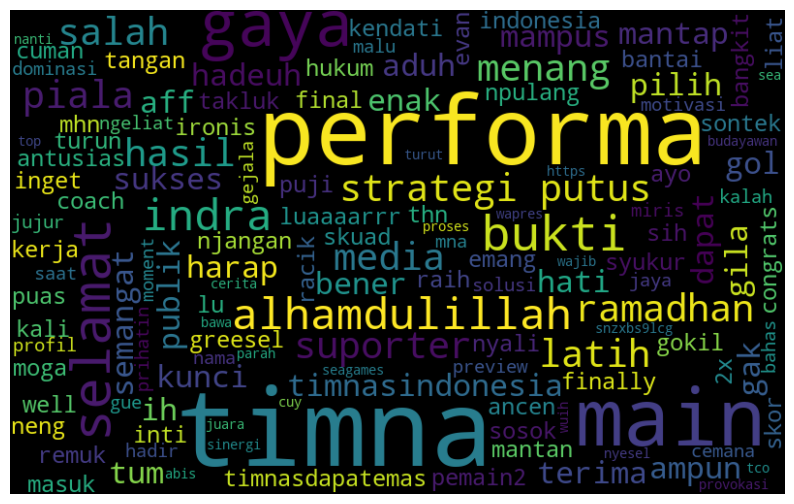

In [90]:
all_words = ' '.join([text for text in data['Tweet']]) 
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

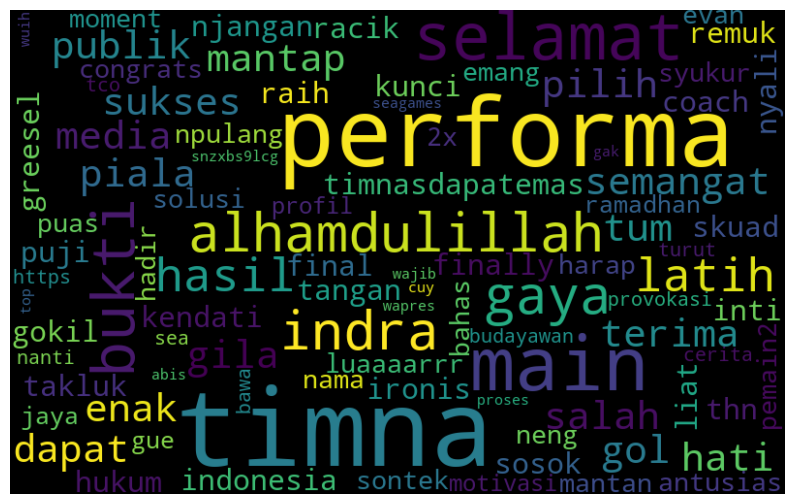

In [54]:
puas = ' '.join([text for text in data['Tweet'][data['Hasil']== 'Puas']])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(puas)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

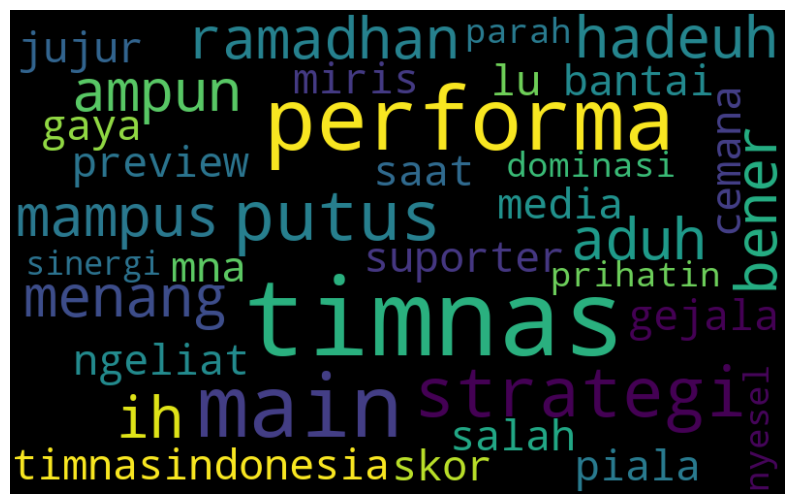

In [55]:
tidakpuas = ' '.join([text for text in data['Tweet'][data['Hasil']== 'Tidak puas']])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(tidakpuas)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

naive bayes

In [101]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
print("MultinomialNB Accuracy: ", accuracy_score(y_test, predicted))
print("MultinomialNB Precision: ", recall_score(y_test, predicted, average="binary", pos_label="Puas"))
print("MultinomialNB Recall: ", precision_score(y_test, predicted, average="binary", pos_label="Puas"))
print("MultinomialNB f1_score: ", f1_score(y_test, predicted, average="binary", pos_label="Puas"))

print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('-----------------------------------------------\n')
#print(classification_report(y_test, predicted, zero_division=0))

MultinomialNB Accuracy:  0.8113207547169812
MultinomialNB Precision:  0.9743589743589743
MultinomialNB Recall:  0.8085106382978723
MultinomialNB f1_score:  0.8837209302325582
confusion matrix:
 [[38  1]
 [ 9  5]]
-----------------------------------------------



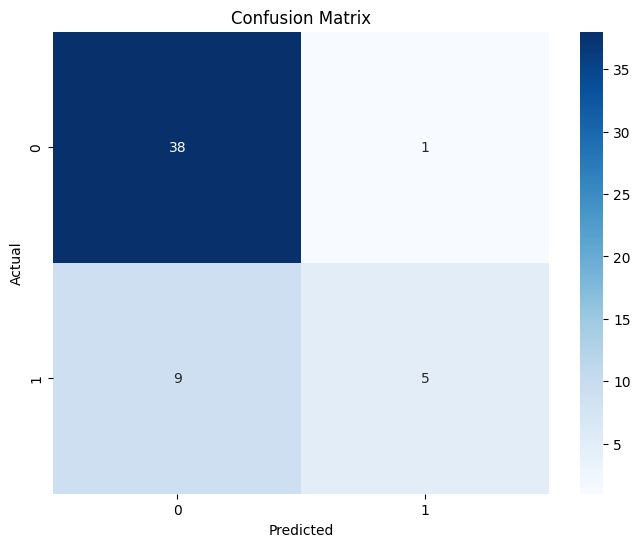

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung confusion matrix
cm = confusion_matrix(y_test, predicted)

# Membuat heatmap confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Menambahkan label pada sumbu x dan y
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Menampilkan judul
plt.title("Confusion Matrix")

# Menampilkan chart
plt.show()


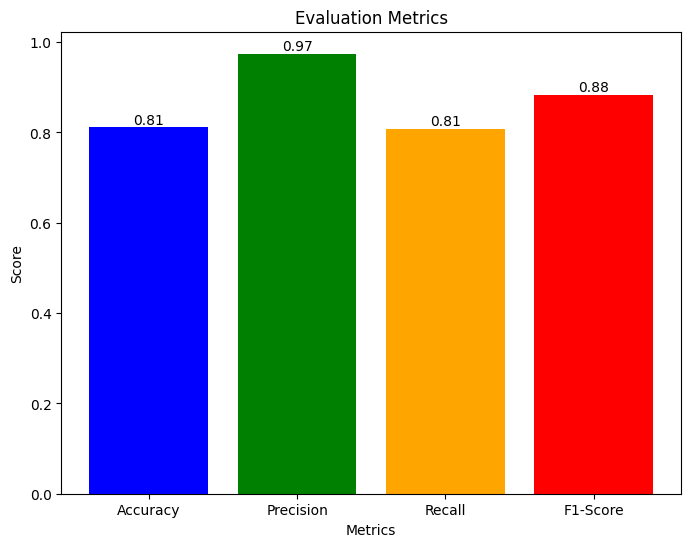

In [102]:
import matplotlib.pyplot as plt

# Menyimpan metrik evaluasi dalam list
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metric_scores = [accuracy_score(y_test, predicted),
                 recall_score(y_test, predicted, average="binary", pos_label="Puas")
                 ,precision_score(y_test, predicted, average="binary", pos_label="Puas")
                 ,f1_score(y_test, predicted, average="binary", pos_label="Puas")]

# Membuat bar chart
plt.figure(figsize=(8, 6))
plt.bar(metric_names, metric_scores, color=['blue', 'green', 'orange', 'red'])

# Menambahkan nilai di atas setiap bar
for i in range(len(metric_names)):
    plt.text(i, metric_scores[i], str(round(metric_scores[i], 2)), ha='center', va='bottom')

# Menambahkan label pada sumbu x dan y
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Evaluation Metrics")

# Menampilkan chart
plt.show()
